# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [27]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

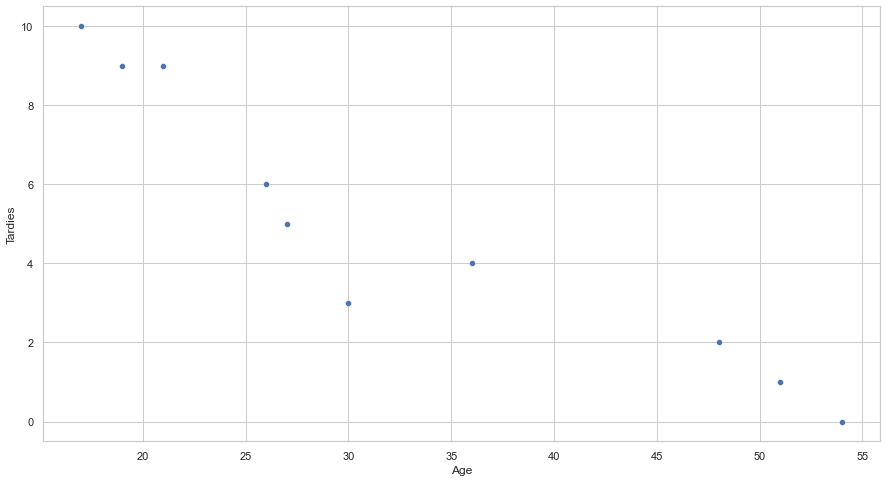

In [28]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [32]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


**Seems like the two variables are negatively correlated - the number of tardies decreases when age increases**

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [33]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [34]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


**The covariance evaluates how much the variables change together (measure of the variance between two variables) without assessing the dependency between variables. Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate)**
<br/>
<br/>
**Both values are negative because the two variables move in inverse directions**



Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [35]:
X = student_data[['Age']]
y = student_data['Tardies']

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X,y)

LinearRegression()

In [38]:
student_data['prediction']=lr.predict(X)
student_data

,Age,Tardies,prediction
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


In [40]:
from sklearn import metrics

mae = metrics.mean_absolute_error(student_data.Tardies, student_data.prediction)
mse = metrics.mean_squared_error(student_data.Tardies, student_data.prediction)
rmse = np.sqrt(metrics.mean_squared_error(student_data.Tardies, student_data.prediction))
r2 = metrics.r2_score(student_data.Tardies, student_data.prediction)

In [41]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 0.9319083427082718
MSE: 1.3319201847356268
RMSE: 1.1540884648655088
R2: 0.8820265558250109


Plot your regression model on your scatter plot.

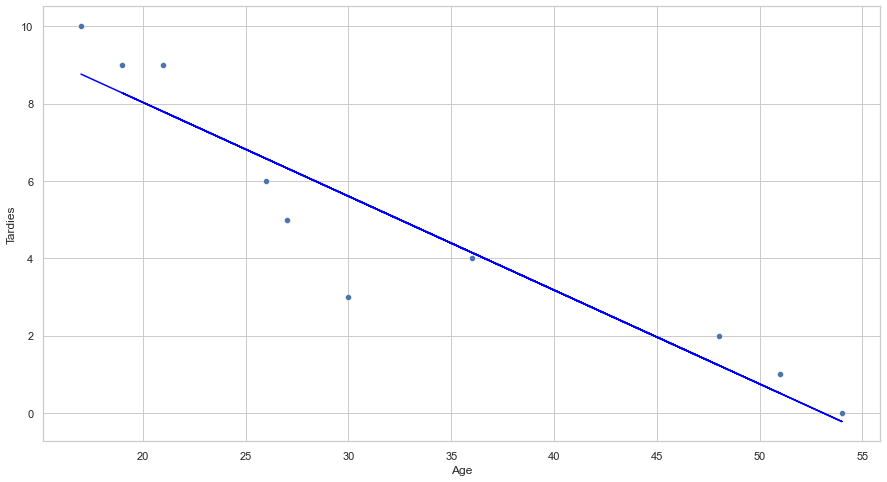

In [48]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])
plt.plot(student_data.Age, student_data["prediction"], color='blue', label='prediction')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [50]:
student_data["avg"] = student_data.Tardies.mean()

In [49]:
RSS = ((student_data.Tardies - student_data["prediction"]) ** 2).sum()
RSS #residual sum of squares

13.319201847356268

In [51]:
TSS = ((student_data.Tardies - student_data["avg"]) ** 2).sum()
TSS

112.9

In [52]:
#R2
r2 = 1 - (RSS/TSS)
r2

0.8820265558250109

**The model seems to fit my data pretty well**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [59]:
vehicles = pd.read_csv ('./vehicles.csv', encoding='unicode_escape')
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [60]:
vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'CO2 Emission Grams/Mile', 'Fuel Cost/Year']]
vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550


In [61]:
vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


**The variables that seem that will be the most important in determining CO2 emissions are: cylinders, fuel barrels/year, combined mpg and fuel cost/year**

**The one that seems to provide the least amount of helpful information for determining CO2 emissions is 'Year'**

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [62]:
result = smf.ols("vehicles['CO2 Emission Grams/Mile'] ~ vehicles['Cylinders'] + vehicles['Fuel Barrels/Year'] + vehicles['Combined MPG'] + vehicles['Fuel Cost/Year']", data=vehicles).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vehicles['CO2 Emission Grams/Mile']   R-squared:                       0.980
Model:                                             OLS   Adj. R-squared:                  0.980
Method:                                  Least Squares   F-statistic:                 4.470e+05
Date:                                 Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                                         23:19:56   Log-Likelihood:            -1.5226e+05
No. Observations:                                35952   AIC:                         3.045e+05
Df Residuals:                                    35947   BIC:                         3.046e+05
Df Model:                                            4                                         
Covariance Type:                             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       131.1563      1.688     77.714      0.000     127.848     134.464
vehicles['Cylinders']             1.0448      0.080     12.993      0.000       0.887       1.202
vehicles['Fuel Barrels/Year']    19.6271      0.060    329.809      0.000      19.510      19.744
vehicles['Combined MPG']         -3.1666      0.043    -73.810      0.000      -3.251      -3.082
vehicles['Fuel Cost/Year']        0.0294      0.000     61.102      0.000       0.028       0.030
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

**As expected, the variables that are most important are the 'cylinders', the 'fue barrels/year', the 'combined mpg' and the 'fuel cost per year'. All of them have a positive slope except for the combined mpg, meaning that as the combined mpg increases the CO2 emissions decrease**

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 